#Introduction

###The Breast Cancer Gene Expression dataset (CuMiDa GSE45827) from Kaggle is a gene expression dataset used for studying breast cancer diagnosis through microarray technology. The dataset was created as part of the CuMiDa collection, focusing on cancer classification tasks. Microarrays measure the expression levels of large numbers of genes simultaneously, offering insights into which genes are upregulated or downregulated in cancerous versus healthy tissues.

##Key Features of the Dataset:

###1. Gene Expression Data: The dataset contains numerical gene expression values for a variety of genes across multiple samples. Each sample represents a patient’s gene expression profile.

###2. Microarray Experiment: The data originates from microarray experiments, where gene activity is measured by detecting mRNA levels. It provides crucial information for identifying molecular markers and classifying samples based on cancer subtypes.

###3. Sample Categories: The dataset includes labels categorizing each sample as either "cancer" or "normal," helping in distinguishing between malignant and non-malignant tissues.

###4. Dimensionality: The dataset is high-dimensional, with thousands of gene expression features. This makes it an ideal candidate for techniques like t-SNE (t-Distributed Stochastic Neighbor Embedding), which can reduce dimensionality while preserving relationships between samples.

###5. Applications: This dataset is valuable for exploring how specific genes contribute to breast cancer progression, and can be used for classification, clustering, and visual exploration tasks.

##Objective:

###For your t-SNE project, the main goal would be to reduce the high-dimensional gene expression data to a 2D or 3D space to visualize the clustering patterns of cancerous versus non-cancerous samples. The t-SNE method can reveal inherent patterns and separations, aiding in identifying important gene expressions or patient subgroups relevant to breast cancer research.

Source: https://www.kaggle.com/datasets/brunogrisci/breast-cancer-gene-expression-cumida/data

In [2]:
!pip install bioinfokit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=5ab16b1e5e78980ec614039522ca5114ec2c8b44ae3c80e69d352ccc78376164
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


##Importing Necessary Libraries

In [3]:
import pandas as pd # Pandas is a powerful library for data manipulation and analysis.
import numpy as np # NumPy is a powerful tool for numerical computations in Python

from sklearn.manifold import TSNE #Imports the TSNE class from sklearn.manifold for dimensionality reduction.
from bioinfokit.visuz import cluster #The cluster module from bioinfokit.visuz for visualizing clustering results.

#Loading the Dataset

In [4]:
df = pd.read_csv('Breast_GSE45827.csv') #The df = pd.read_csv line reads a CSV file into a DataFrame named df using the pandas library.

In [5]:
df.head() #We will now read the data from a CSV file into a Pandas DataFrame Let us have a look at how our dataset looks like using df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [6]:
df.shape # Displays the total count of the Rows and Columns respectively.

(151, 54677)

In [7]:
df.isnull().sum() #Is used to display the dimensions of the DataFrame df. Giving you a quick overview of the size of your dataset.

,0
samples,0
type,0
1007_s_at,0
1053_at,0
117_at,0
...,...
AFFX-ThrX-5_at,0
AFFX-ThrX-M_at,0
AFFX-TrpnX-3_at,0
AFFX-TrpnX-5_at,0


###There is no null or missing value in the dataset.

In [8]:
df.info() #Displays the total count of values present in the particular column along with the null count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 63.0+ MB


In [9]:
df[df.duplicated()] #This code returns the count of duplicate rows in the DataFrame df.

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at


In [11]:
# Check the data types of each column
print(df.dtypes)


samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object


In [12]:
from sklearn.preprocessing import LabelEncoder #This class is used to convert categorical data (like strings) into numerical labels.

# Apply Label Encoding to each categorical column
for col in df.select_dtypes(include=[object]).columns: #Iterates through each column in the DataFrame df that contains categorical data (identified by the object data type).
    le = LabelEncoder() #Creates an instance of the LabelEncoder for each categorical column.
    df[col] = le.fit_transform(df[col])


le.fit_transform(): Fits the encoder to the unique categories in the column (fit) and then transforms the categorical values into numerical labels (transform).
The transformed numerical labels replace the original categorical values in the DataFrame.

Purpose:

Many machine learning algorithms require numerical input data. Label Encoding is a simple technique to convert categorical features into a numerical format that these algorithms can understand. It assigns a unique numerical label (starting from 0) to each category within a feature.

In [13]:
from sklearn.preprocessing import StandardScaler  #Data Scaling
from sklearn.decomposition import PCA #Dimensionality Reduction
from sklearn.manifold import TSNE #Visualization
import matplotlib.pyplot as plt #Plotting

# Preprocessing

In [14]:
df_numeric = df.select_dtypes(include=[float, int])
#This line selects only the columns in your DataFrame df that contain numerical data (either floating-point numbers or integers).
#This creates a new DataFrame df_numeric with just the numerical features.

scaler = StandardScaler()
#This initializes a StandardScaler object from scikit-learn. This scaler standardizes features by removing the mean and scaling to unit variance.

X_scaled = scaler.fit_transform(df_numeric)
#This line does two things:
#fit: Calculates the mean and standard deviation for each numerical feature in df_numeric.
#transform: Applies the standardization by subtracting the mean and dividing by the standard deviation for each feature, resulting in a scaled dataset X_scaled.


##Purpose and Influence:

###Importance of Scaling: Many machine learning algorithms (especially those based on distance calculations like k-NN, SVM, or those using gradient descent) perform better when numerical features are on a similar scale.
###Influence on Dataset: Feature scaling prevents features with larger ranges from dominating the learning process. It ensures that all features contribute equally to the model training, leading to potentially better model performance and faster convergence.

In [15]:
# Optional: Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
#Initializes a PCA object from scikit-learn, setting the number of components (dimensions) to keep after reduction to 50.
X_pca = pca.fit_transform(X_scaled)
#fit: Learns the principal components from the scaled data X_scaled.
#transform: Projects the scaled data onto the first 50 principal components, reducing the dimensionality of the data to 50 features.

###Purpose and Influence:

####Purpose of PCA: PCA is used to reduce the number of features in a dataset while retaining as much of the original variance as possible. This can help with:

* Speeding up model training.
* Reducing noise and overfitting.
* Visualizing high-dimensional data in lower dimensions.

####Influence on Dataset: PCA transforms the original features into a new set of uncorrelated features (principal components) that capture the most important patterns in the data. The dataset is now represented in a lower-dimensional space, which can be easier to analyze and visualize.

####In the t-SNE analysis, applying PCA beforehand can potentially improve the results by:

* Removing noise: PCA can filter out less important variations in the data.
* Speeding up t-SNE: t-SNE is computationally expensive for high-dimensional data, so reducing dimensionality with PCA first can make it more efficient

In [16]:
# t-SNE Modeling
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)  #Initializes a t-SNE object:
X_tsne = tsne.fit_transform(X_pca)

###1. tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42): Initializes a t-SNE object:

* n_components=2: Specifies that the data should be reduced to 2 dimensions for visualization.
* perplexity=30: Controls the local neighborhood size considered when computing similarities between data points.
* n_iter=1000: Sets the number of iterations for the optimization process.
* random_state=42: Ensures reproducibility of the results.

###2. X_tsne = tsne.fit_transform(X_pca):

* fit_transform: Applies t-SNE to the data X_pca (which was likely obtained after PCA), reducing it to 2 dimensions and storing the result in X_tsne.

##Purpose and Influence:

* Purpose of t-SNE: t-SNE is a non-linear dimensionality reduction technique primarily used for visualization of high-dimensional data. It aims to preserve the local structure of the data, meaning that points close to each other in the original high-dimensional space will also be close in the low-dimensional representation.

* Influence on Dataset: t-SNE transforms the data into a 2D representation where you can visually explore clusters and patterns. It does not directly change the original dataset but provides a new way to visualize and understand the relationships between data points.

In the analysis, t-SNE helps you visualize how the breast cancer gene expression samples cluster in a 2D space, potentially revealing distinct groups or patterns related to cancer vs. normal samples.

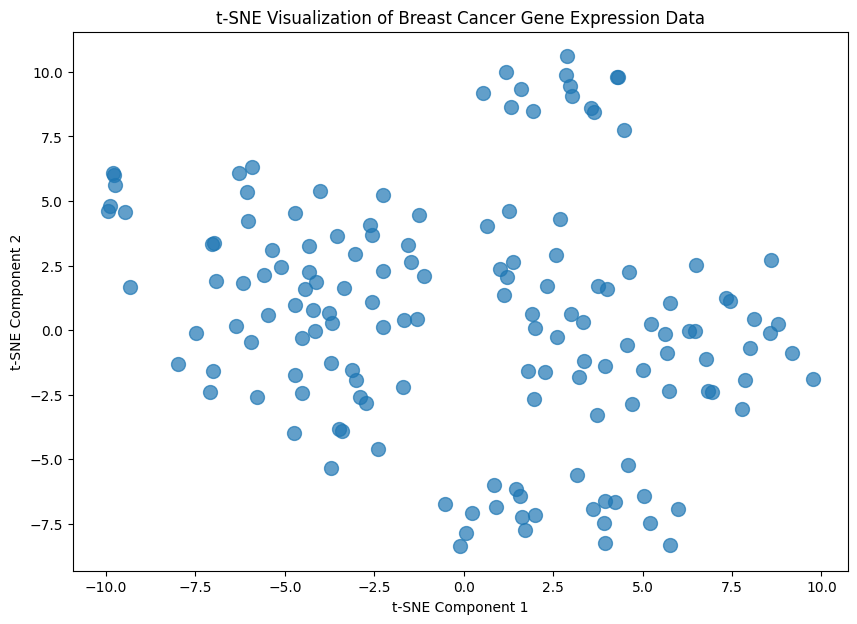

In [17]:
# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=100, alpha=0.7)
plt.title("t-SNE Visualization of Breast Cancer Gene Expression Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

###This code creates a scatter plot to visualize the results of the t-SNE dimensionality reduction.

###In simple words, it takes the 2-dimensional data generated by t-SNE and plots each data point as a dot on a graph. The position of each dot represents its location in the reduced 2D space. This allows you to see if there are any natural groupings or clusters within your data. The title, labels, and other settings just make the plot look nicer and easier to understand.